In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\datasets_1057_1913_AirPassengers.csv")

In [3]:
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)
indexedDataset=df.set_index(['Month'])

In [4]:
from datetime import datetime
indexedDataset.tail(10)

,#Passengers
Month,
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390


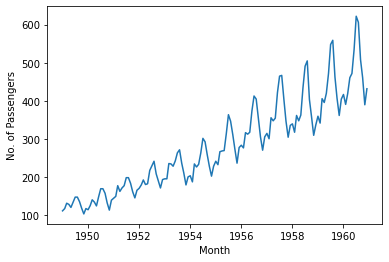

In [5]:
plt.xlabel("Month")
plt.ylabel("No. of Passengers")
plt.plot(indexedDataset)

In [6]:
#rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


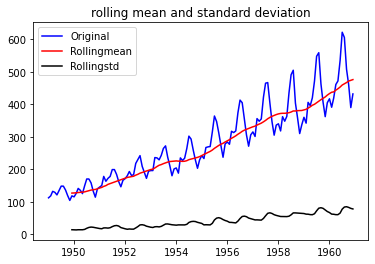

In [7]:
#rolling statistics plot
orig = plt.plot(indexedDataset,color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Rollingmean')
std = plt.plot(rolstd,color='black',label='Rollingstd')
plt.legend(loc='best')
plt.title('rolling mean and standard deviation')
plt.show(block=False)

In [12]:
#dickey fuller test
from statsmodels.tsa.stattools import adfuller

print("Dickey fuller test results:")
dftest=adfuller(indexedDataset['#Passengers'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
print(dfoutput)

Dickey fuller test results:
Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


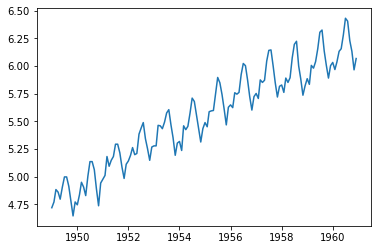

In [11]:
indexedDataset_logScale= np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

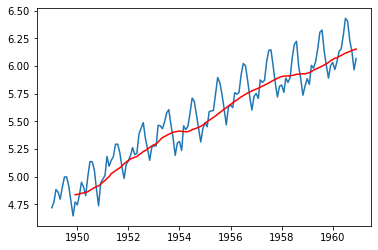

In [14]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [15]:
datasetlogscaleminusmovingavg = indexedDataset_logScale - movingAverage
datasetlogscaleminusmovingavg.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [16]:
datasetlogscaleminusmovingavg.dropna(inplace=True)
datasetlogscaleminusmovingavg.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(movingAverage,color='red',label='Rolling mean')
    std=plt.plot(movingSTD,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('standard deviation and rolling mean')
    plt.show(block=False)
    
    print("Dickey fuller test results:")
    dftest=adfuller(timeseries['#Passengers'],autolag='AIC')

    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]= value
    print(dfoutput)
    

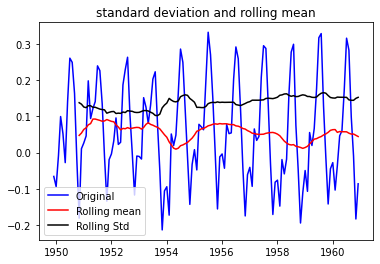

Dickey fuller test results:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags used                      13.000000
Number of observations used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64


In [20]:
test_stationarity(datasetlogscaleminusmovingavg)

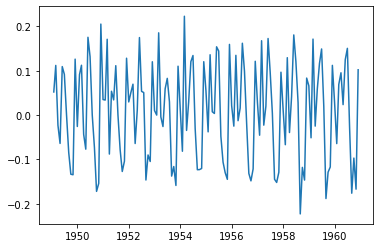

In [21]:
logdiffshifting= indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(logdiffshifting)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

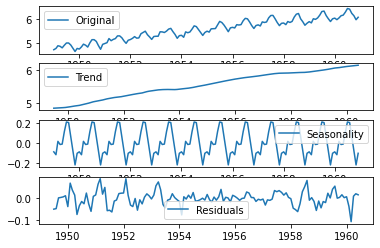

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal= decomposition.seasonal
residual= decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout



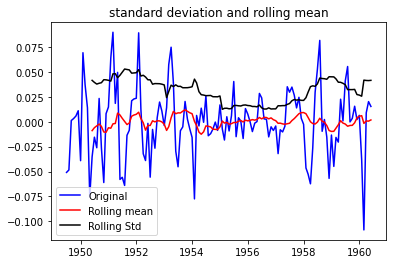

Dickey fuller test results:


KeyError: '#Passengers'

In [26]:
decomposedlogData = residual
decomposedlogData.dropna(inplace=True)
test_stationarity(decomposedlogData)

In [28]:
decomposedlogData

Month
1949-07-01   -0.050884
1949-08-01   -0.048415
1949-09-01    0.001223
1949-10-01    0.003156
1949-11-01    0.005749
                ...   
1960-02-01   -0.038032
1960-03-01   -0.108624
1960-04-01    0.009006
1960-05-01    0.020213
1960-06-01    0.015348
Name: resid, Length: 132, dtype: float64

C:\Users\Dell\OneDrive\Documents\envs\py36\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


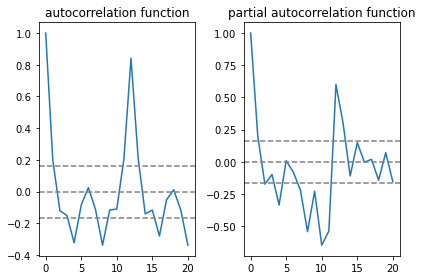

In [41]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(logdiffshifting,nlags=20)
lag_pacf = pacf(logdiffshifting,nlags=20,method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(logdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(logdiffshifting)),linestyle='--',color='gray')
plt.title('autocorrelation function')
            
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(logdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(logdiffshifting)),linestyle='--',color='gray')
plt.title('partial autocorrelation function')
plt.tight_layout()

In [40]:
logdiffshifting.dropna(inplace=True)

C:\Users\Dell\OneDrive\Documents\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\OneDrive\Documents\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plot AR model


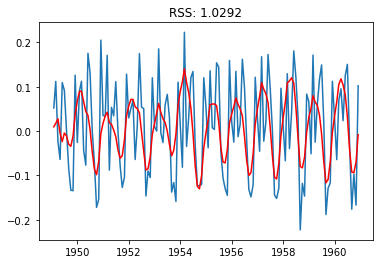

In [44]:
#AR model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(logdiffshifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-logdiffshifting['#Passengers'])**2))
print("plot AR model")

C:\Users\Dell\OneDrive\Documents\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\OneDrive\Documents\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plot MA model


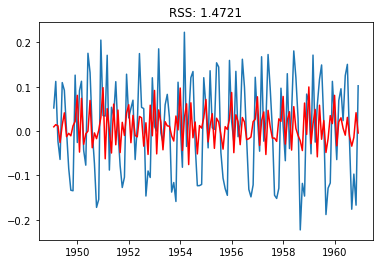

In [46]:
#MA model
model= ARIMA(indexedDataset_logScale,order=(0,1,2))
results_MA= model.fit(disp=-1)
plt.plot(logdiffshifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-logdiffshifting['#Passengers'])**2))
print("plot MA model")

C:\Users\Dell\OneDrive\Documents\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\OneDrive\Documents\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

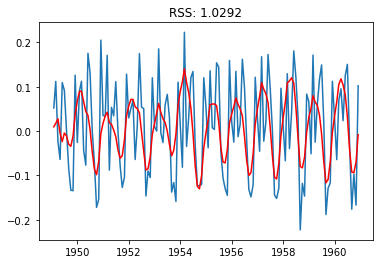

In [47]:
model= ARIMA(indexedDataset_logScale,order=(2,1,2))
results_ARIMA= model.fit(disp=-1)
plt.plot(logdiffshifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-logdiffshifting['#Passengers'])**2))


In [48]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff)

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64


In [49]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [53]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

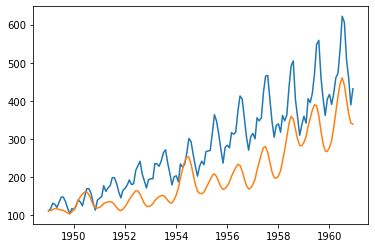

In [54]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [55]:
indexedDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


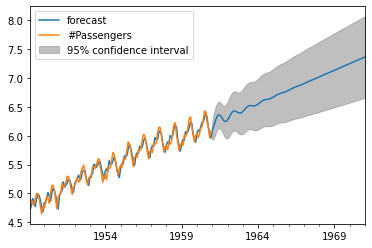

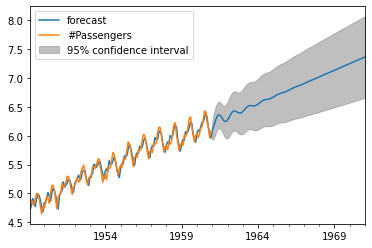

In [56]:
results_ARIMA.plot_predict(1,264)

In [57]:
results_ARIMA.forecast(steps=120)

(array([6.09553403, 6.15281422, 6.22442988, 6.2924112 , 6.34164726,
        6.36359361, 6.35784676, 6.33139289, 6.29597526, 6.26447706,
        6.24738327, 6.25025182, 6.27275853, 6.3094033 , 6.35151508,
        6.38988662, 6.41727379, 6.43011043, 6.42906673, 6.41842471,
        6.40456141, 6.39403609, 6.39183084, 6.40019511, 6.41833704,
        6.44295418, 6.46937442, 6.49293985, 6.5102411 , 6.51989019,
        6.52267561, 6.5211237 , 6.51864514, 6.51853682, 6.52311921,
        6.53322363, 6.54812874, 6.5659156 , 6.58410307, 6.60036533,
        6.61313254, 6.62192765, 6.62737771, 6.63093112, 6.63438676,
        6.63937976, 6.64696499, 6.65739838, 6.67015322, 6.68414247,
        6.69806619, 6.7107789 , 6.72157717, 6.73033967, 6.73749793,
        6.74386362, 6.75037308, 6.75782581, 6.76668672, 6.77699815,
        6.7884131 , 6.80032843, 6.81207182, 6.82308745, 6.83307119,
        6.84202474, 6.85022293, 6.85811203, 6.86617323, 6.87479136,
        6.88416288, 6.8942637 , 6.90487875, 6.91